In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("framingham.csv")

In [4]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


spliting data (4240 records into 3000,1240) and aslo same data siplitting similarly(3000,1240) without target variables

In [5]:
# Split the dataset
df_3000 = df.iloc[:3000].copy()
df_1240 = df.iloc[3000:].copy()

# Save the original splits with target column
df_3000.to_csv('framingham_3000.csv', index=False)
df_1240.to_csv('framingham_1240.csv', index=False)

# Remove the target column 'TenYearCHD'
df_3000_X = df_3000.drop(columns=['TenYearCHD'])
df_1240_X = df_1240.drop(columns=['TenYearCHD'])

# Save the splits without target column
df_3000_X.to_csv('framingham_3000_NT.csv', index=False)
df_1240_X.to_csv('framingham_1240_NT.csv', index=False)

Training Pipeline(wth 3000 dataset) using randomforest model

In [6]:

# Load your dataset
df = pd.read_csv("framingham_3000.csv")  # Replace with your file path

# Check if any negative values are present
has_negative = (df.select_dtypes(include='number') < 0).any().any()

print("Contains negative values:" if has_negative else "No negative values found.")


No negative values found.


In [7]:
df.shape

(3000, 16)

In [8]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print result
if not duplicate_rows.empty:
    print(f"Found {len(duplicate_rows)} duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3000 non-null   int64  
 1   age              3000 non-null   int64  
 2   education        2925 non-null   float64
 3   currentSmoker    3000 non-null   int64  
 4   cigsPerDay       2985 non-null   float64
 5   BPMeds           2960 non-null   float64
 6   prevalentStroke  3000 non-null   int64  
 7   prevalentHyp     3000 non-null   int64  
 8   diabetes         3000 non-null   int64  
 9   totChol          2962 non-null   float64
 10  sysBP            3000 non-null   float64
 11  diaBP            3000 non-null   float64
 12  BMI              2983 non-null   float64
 13  heartRate        2999 non-null   float64
 14  glucose          2718 non-null   float64
 15  TenYearCHD       3000 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 375.1 KB


In [10]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,62,2.0,0,0.0,0.0,0,0,0,317.0,126.0,75.0,23.29,71.0,86.0,0
2996,0,50,1.0,0,0.0,0.0,0,0,0,229.0,121.0,85.5,23.09,63.0,75.0,0
2997,1,36,4.0,1,40.0,0.0,0,0,0,200.0,103.0,67.5,30.82,67.0,72.0,0
2998,1,44,1.0,0,0.0,0.0,0,0,0,234.0,135.0,88.0,25.65,52.0,83.0,0


continous variables in dataset:
 age , cigsPerDay , totChol , sysBP , diaBP , BMI , heartRate , glucose

categorical variables in dataset:
male , education , currentSmoker , BPMeds , prevalentStroke , prevalentHyp , diabetes

target variable(categorical):
TenYearCHD


In [11]:
df.isna().sum()

male                 0
age                  0
education           75
currentSmoker        0
cigsPerDay          15
BPMeds              40
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 17
heartRate            1
glucose            282
TenYearCHD           0
dtype: int64

checking the contious variables does they follow normal distribution or not

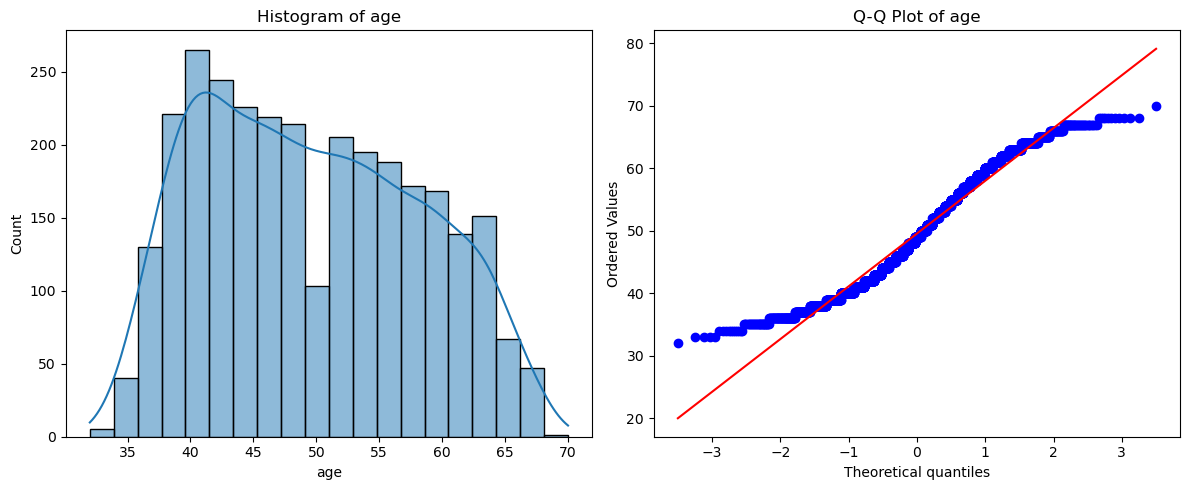

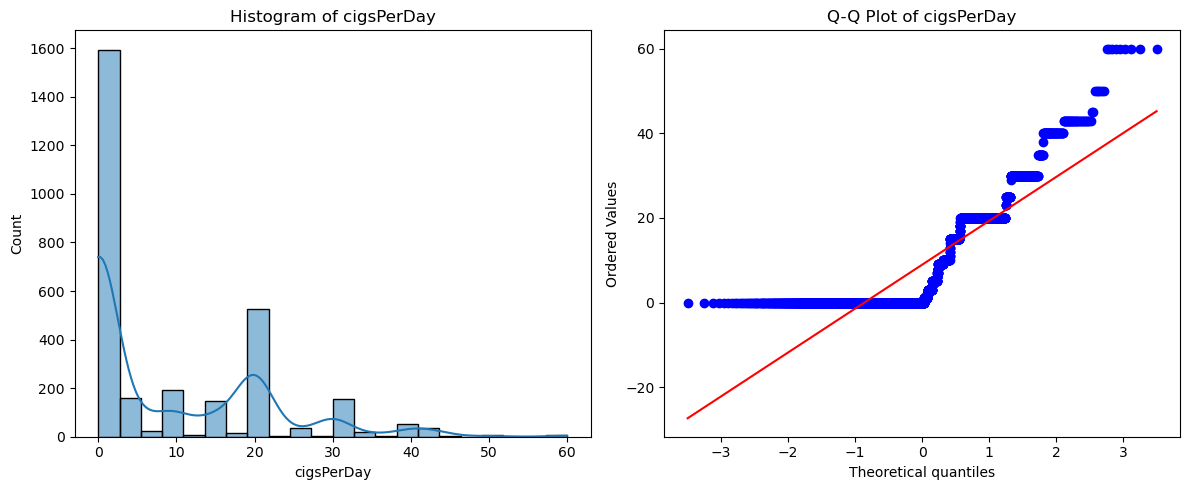

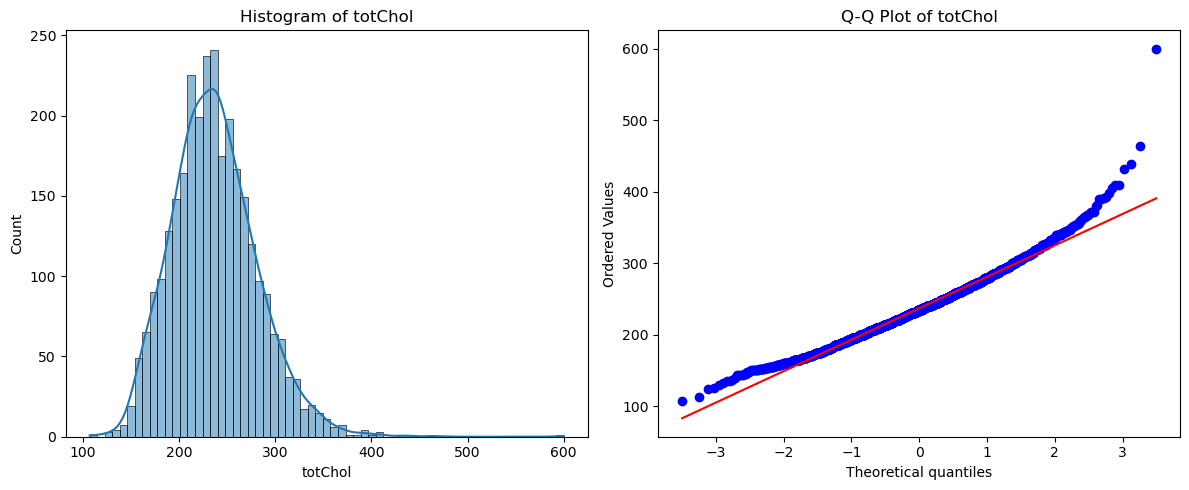

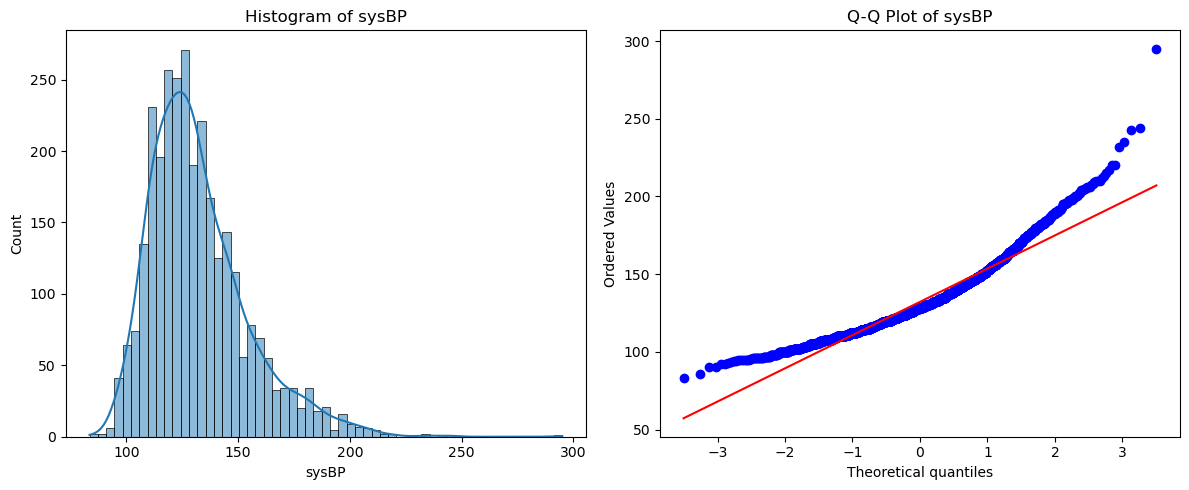

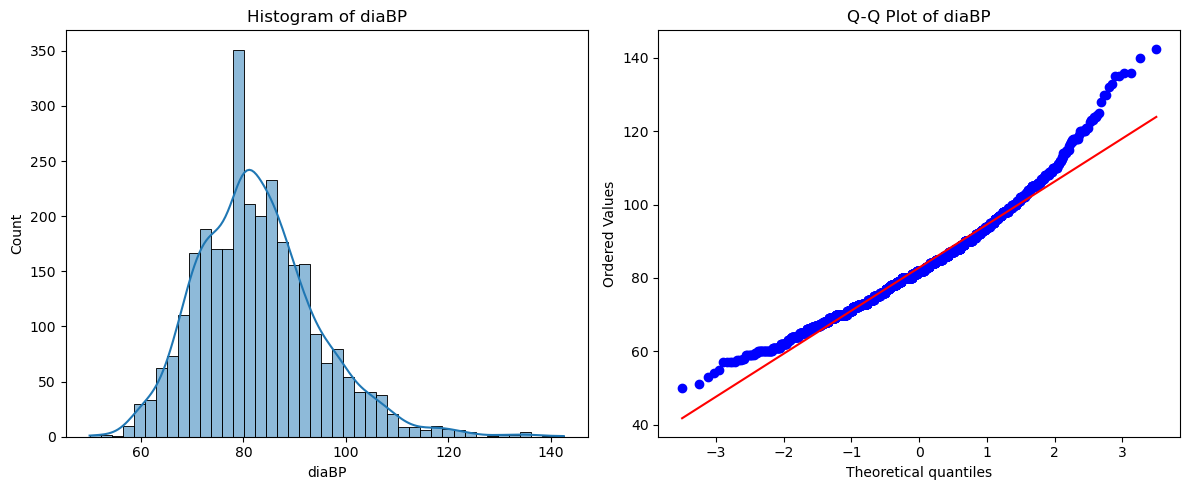

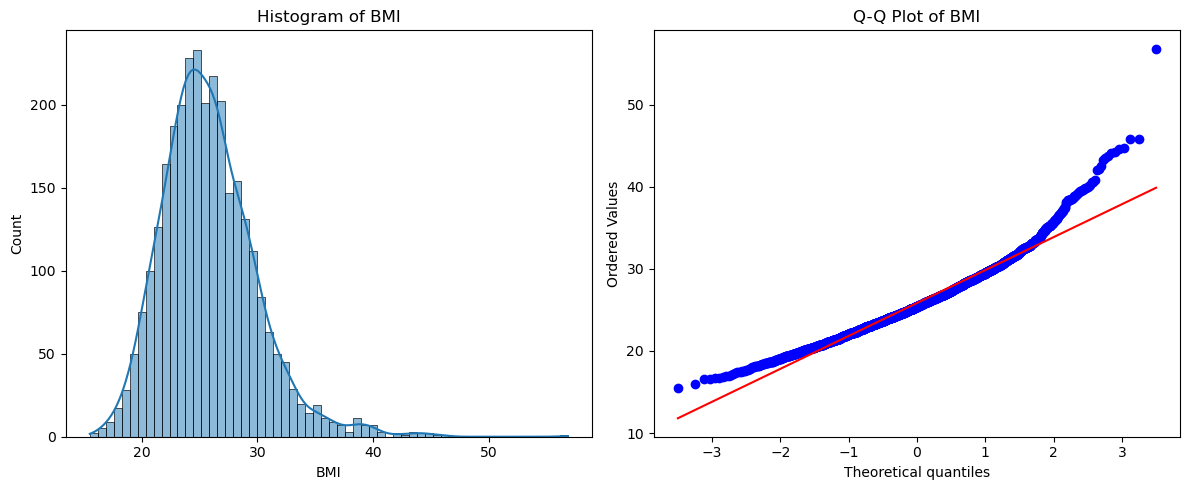

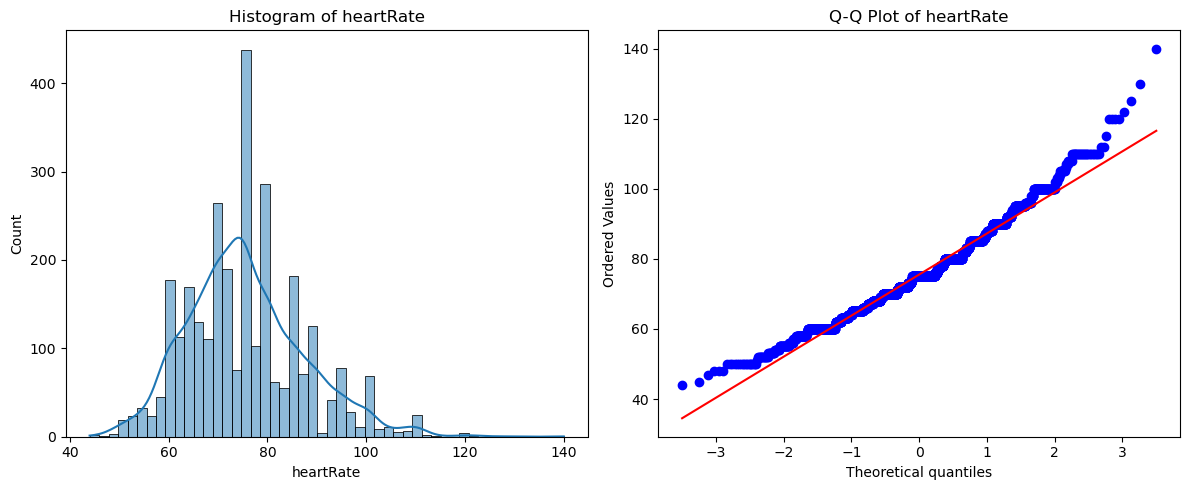

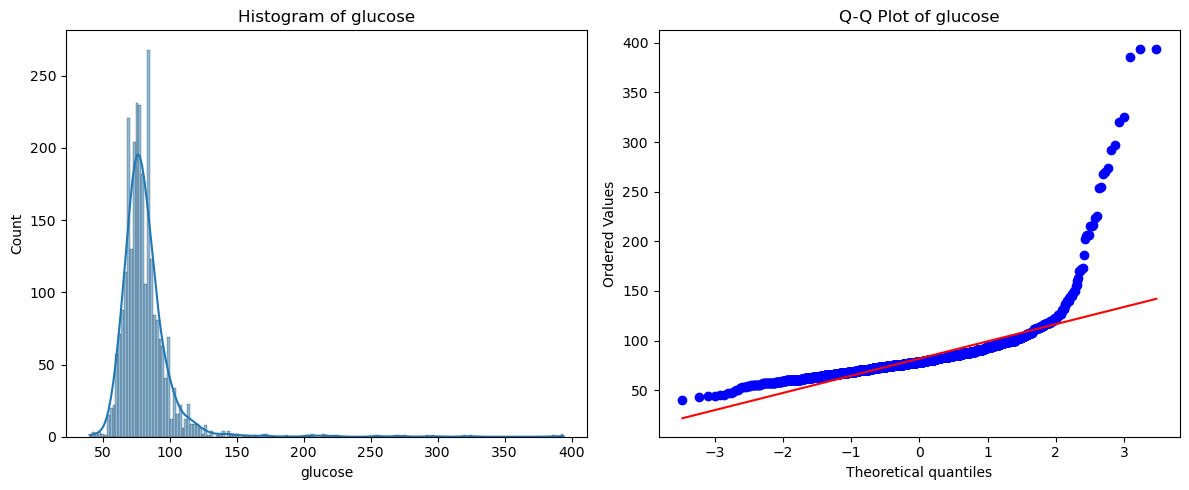

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# List of continuous columns
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plot histogram and Q-Q plot
for col in continuous_cols:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

    plt.tight_layout()
    plt.show()


here all the continous variables except cigsPerDay follows normal distribution

In [13]:
# Shapiro-Wilk Normality Test for Continuous Columns
from scipy.stats import shapiro

# Define continuous columns
continuous_cols = ['cigsPerDay']

# Perform Shapiro-Wilk Test
print("Shapiro-Wilk Test Results:\n")
for col in continuous_cols:
    data = df[col].dropna()  # Remove NaN values
    stat, p = shapiro(data)
    result = "Normally Distributed" if p > 0.05 else "Not Normally Distributed"
    print(f"{col:12} | p-value = {p:.5f} | {result}")

Shapiro-Wilk Test Results:

cigsPerDay   | p-value = 0.00000 | Not Normally Distributed


| Column       | Type        | Nulls | Distribution   | Imputation Method |
| ------------ | ----------- | ----- | -------------- | ----------------- |
| `education`  | Categorical | 75    | —              | **Mode**          |
| `BPMeds`     | Categorical | 40    | —              | **Mode**          |
| `cigsPerDay` | Continuous  | 15    | Not normal     | **Median**        |
| `totChol`    | Continuous  | 38    | Normal         | **Mean**          |
| `BMI`        | Continuous  | 17    | Normal         | **Mean**          |
| `heartRate`  | Continuous  | 1     | Normal         | **Mean**          |
| `glucose`    | Continuous  | 282   | Normal         | **Mean**          |


In [14]:
#missing values treatment

# Fill categorical columns with mode
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

# Fill non-normally distributed column with median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)

# Fill normally distributed columns with mean
for col in ['totChol', 'BMI', 'heartRate', 'glucose']:
    df[col].fillna(df[col].mean(), inplace=True)

# Check if nulls are handled
print(df.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


C:\Users\MounikaReddyBoggariV\AppData\Local\Temp\ipykernel_5104\2855506026.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
C:\Users\MounikaReddyBoggariV\AppData\Local\Temp\ipykernel_5104\2855506026.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [15]:
#feature selection
categorical_vars = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']
continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
target = 'TenYearCHD'

In [16]:
#Code for Chi-Square Test (Categorical Features vs Target)
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Encode categorical input variables if not already numeric
X_cat = df[categorical_vars].copy()
y_cat = df[target]

# Label encode all categorical input features
for col in X_cat.columns:
    if X_cat[col].dtype == 'object':
        X_cat[col] = LabelEncoder().fit_transform(X_cat[col])

# Perform chi-square test
chi2_selector = SelectKBest(score_func=chi2, k='all')
chi2_selector.fit(X_cat, y_cat)

# Show results
chi2_scores = pd.DataFrame({
    'Feature': categorical_vars,
    'Chi2 Score': chi2_selector.scores_,
    'p-value': chi2_selector.pvalues_
})

print("Chi-Square Test Results (Categorical Inputs vs Categorical Target):")
print(chi2_scores.sort_values(by='Chi2 Score', ascending=False))


Chi-Square Test Results (Categorical Inputs vs Categorical Target):
           Feature  Chi2 Score       p-value
5     prevalentHyp   58.672393  1.862364e-14
6         diabetes   39.242378  3.743267e-10
4  prevalentStroke   13.008048  3.101550e-04
0             male   11.859060  5.738150e-04
3           BPMeds   10.133980  1.455607e-03
1        education    5.754597  1.644556e-02
2    currentSmoker    0.877970  3.487583e-01


| Feature         | p-value      | Interpretation       |
| --------------- | ------------ | -------------------- |
| prevalentHyp    | **1.86e-14** | ✅ Very significant   |
| diabetes        | **3.74e-10** | ✅ Very significant   |
| prevalentStroke | **3.10e-04** | ✅ Significant        |
| male            | **5.73e-04** | ✅ Significant        |
| BPMeds          | **1.45e-03** | ✅ Significant        |
| education       | **1.64e-02** | ✅ Weakly significant |
| currentSmoker   | **0.34**     | ❌ Not significant    |
Higher Chi2 or F-scores indicate stronger relationship with the target.
p-value < 0.05 generally means the feature is statistically significant for predicting TenYearCHD.

In [17]:
#Code for ANOVA F-Test (Continuous Features vs Target)
from sklearn.feature_selection import f_classif

X_cont = df[continuous_vars]
y_cont = df[target]

# Perform ANOVA F-test
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X_cont, y_cont)

anova_scores = pd.DataFrame({
    'Feature': continuous_vars,
    'F Score': anova_selector.scores_,
    'p-value': anova_selector.pvalues_
})

print("\nANOVA F-Test Results (Continuous Inputs vs Categorical Target):")
print(anova_scores.sort_values(by='F Score', ascending=False))



ANOVA F-Test Results (Continuous Inputs vs Categorical Target):
      Feature     F Score       p-value
0         age  156.084847  5.928346e-35
3       sysBP  141.886242  5.365650e-32
7     glucose   60.164451  1.186945e-14
4       diaBP   60.033455  1.266971e-14
2     totChol   20.583972  5.931399e-06
5         BMI   19.842492  8.716853e-06
1  cigsPerDay   13.516724  2.405940e-04
6   heartRate    1.032286  3.097043e-01


| Feature    | p-value      | Interpretation     |
| ---------- | ------------ | ------------------ |
| age        | **5.92e-35** | ✅ Very significant |
| sysBP      | **5.36e-32** | ✅ Very significant |
| glucose    | **1.18e-14** | ✅ Significant      |
| diaBP      | **1.26e-14** | ✅ Significant      |
| totChol    | **5.93e-06** | ✅ Significant      |
| BMI        | **8.71e-06** | ✅ Significant      |
| cigsPerDay | **2.41e-04** | ✅ Significant      |
| heartRate  | **0.31**     | ❌ Not significant  |


In [18]:
df_selected = df.drop(['currentSmoker', 'heartRate'], axis=1)


In [19]:
df_selected

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,62,2.0,0.0,0.0,0,0,0,317.0,126.0,75.0,23.29,86.0,0
2996,0,50,1.0,0.0,0.0,0,0,0,229.0,121.0,85.5,23.09,75.0,0
2997,1,36,4.0,40.0,0.0,0,0,0,200.0,103.0,67.5,30.82,72.0,0
2998,1,44,1.0,0.0,0.0,0,0,0,234.0,135.0,88.0,25.65,83.0,0


In [20]:
df_selected.shape

(3000, 14)

In [21]:
from sklearn.preprocessing import RobustScaler

# Define continuous variables
continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to continuous variables
df_selected[continuous_vars] = scaler.fit_transform(df_selected[continuous_vars])

# Check scaled data (optional preview)
print(df_selected[continuous_vars].head())


        age  cigsPerDay   totChol     sysBP  diaBP    BMI   glucose
0 -0.714286        0.00 -0.714286 -0.814815 -0.768  0.311 -0.244898
1 -0.214286        0.00  0.267857 -0.259259 -0.064  0.663 -0.326531
2 -0.071429        1.00  0.178571 -0.018519 -0.128 -0.015 -0.816327
3  0.857143        1.50 -0.178571  0.814815  0.832  0.633  1.877551
4 -0.214286        1.15  0.892857  0.074074  0.128 -0.463  0.408163


In [22]:
from sklearn.model_selection import train_test_split
#step1: split data
# Separate features and target
X = df_selected.drop('TenYearCHD', axis=1)
y = df_selected['TenYearCHD']

# Perform the split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2400, 13)
X_test shape: (600, 13)
y_train shape: (2400,)
y_test shape: (600,)


In [23]:
from sklearn.ensemble import IsolationForest

# Step 2: Build and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train)

IsolationForest(random_state=42)

In [24]:
import pickle

# Step 3: Save the trained Isolation Forest model using pickle
with open('isolation_forest_model.pkl', 'wb') as model_file:
    pickle.dump(iso_forest, model_file)

print("✅ Model saved as 'isolation_forest_model.pkl'")


✅ Model saved as 'isolation_forest_model.pkl'


=== Evaluation Metrics ===
Confusion Matrix:
[[456  52]
 [ 66  26]]
Accuracy: 0.8033
Precision: 0.3333
Recall: 0.2826
F1-Score: 0.3059


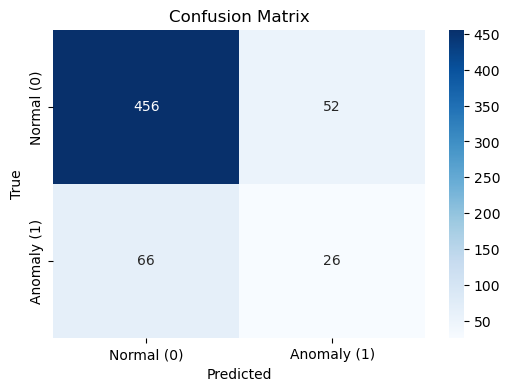

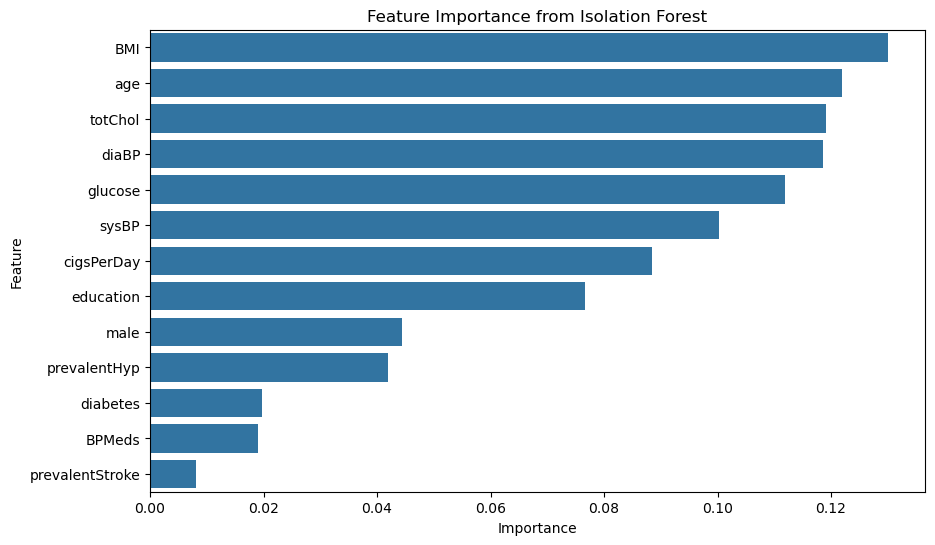

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Predict anomalies on the test set
y_pred = iso_forest.predict(X_test)
# Map Isolation Forest predictions: -1 (anomaly) -> 1, 1 (normal) -> 0
y_pred_mapped = np.where(y_pred == -1, 1, 0)

# Step 2: Compute evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_mapped)
accuracy = accuracy_score(y_test, y_pred_mapped)
precision = precision_score(y_test, y_pred_mapped)
recall = recall_score(y_test, y_pred_mapped)
f1 = f1_score(y_test, y_pred_mapped)

# Print metrics
print("=== Evaluation Metrics ===")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Step 3: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal (0)', 'Anomaly (1)'], 
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 4: Compute and visualize feature importance
feature_importance = np.abs(iso_forest.feature_importances_) if hasattr(iso_forest, 'feature_importances_') else np.mean([tree.feature_importances_ for tree in iso_forest.estimators_], axis=0)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Isolation Forest')
plt.show()

for checking drift between 3000 (with target)and (3000,1240) without target

In [26]:
df1=pd.read_csv("framingham_3000_NT.csv")
df2=pd.read_csv("framingham_1240_NT.csv")


In [27]:
df.shape

(3000, 16)

In [28]:
df1.shape

(3000, 15)

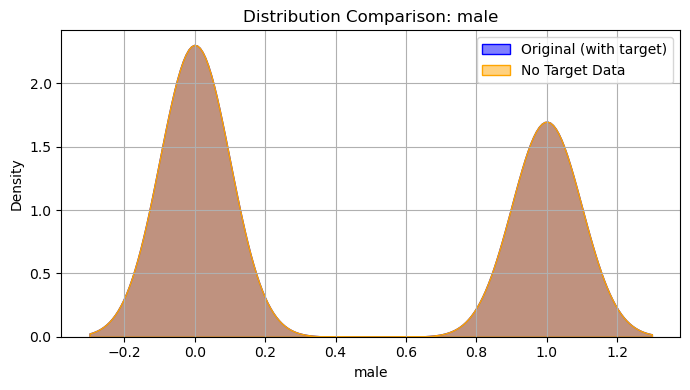

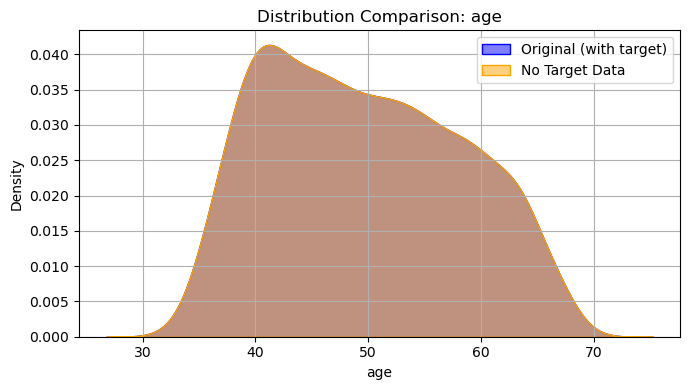

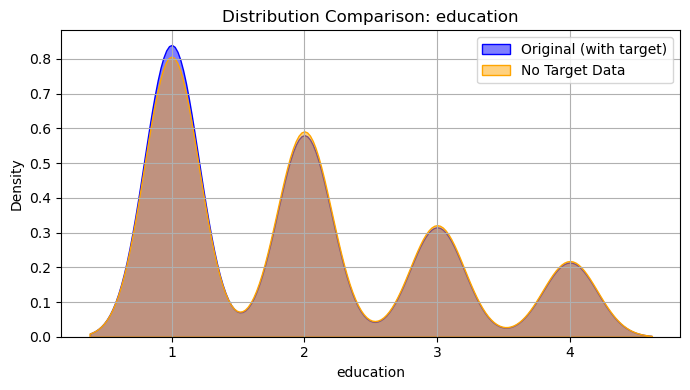

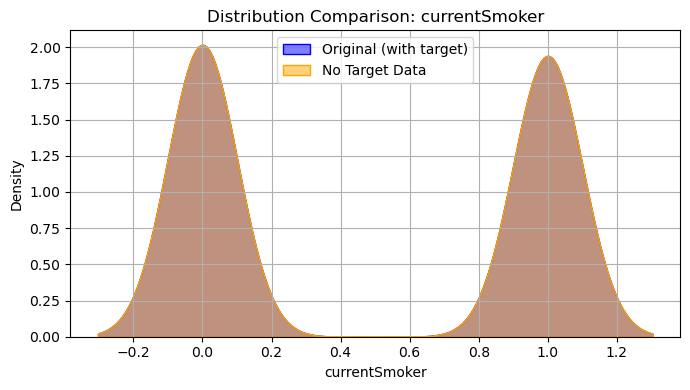

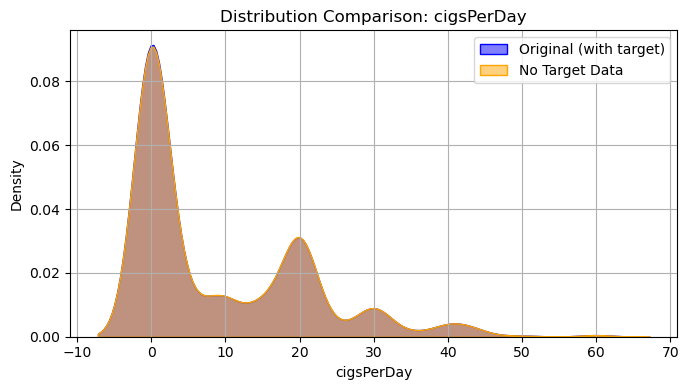

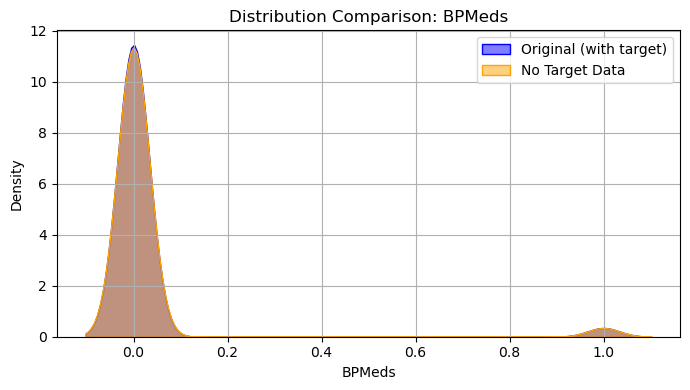

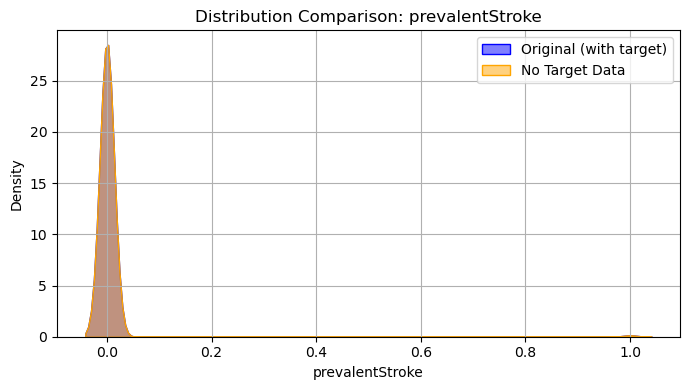

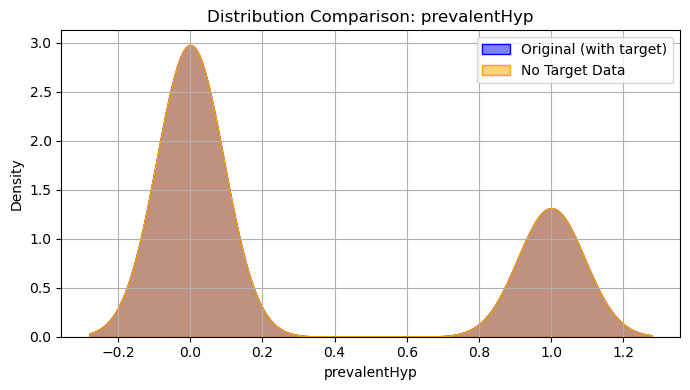

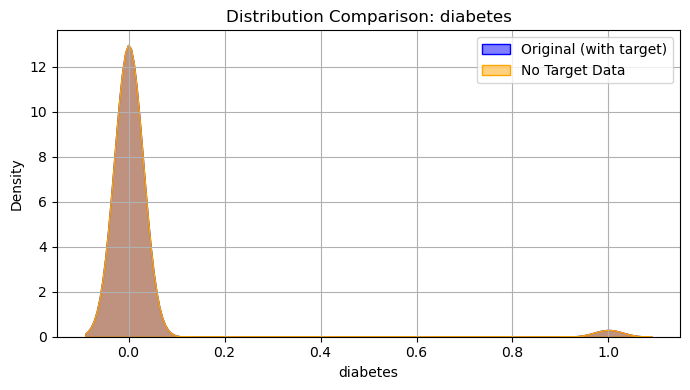

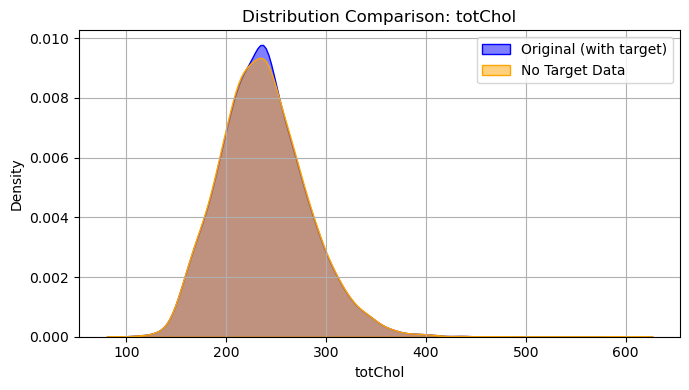

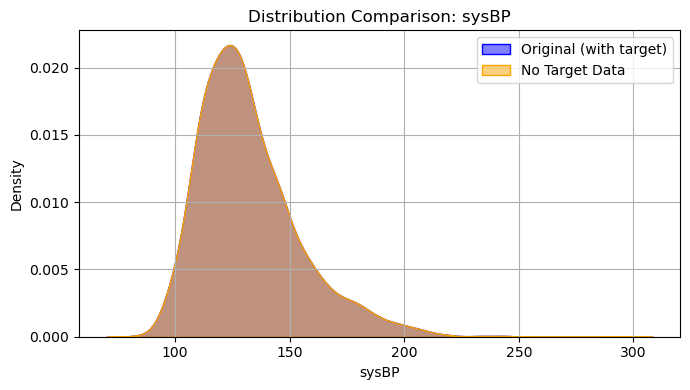

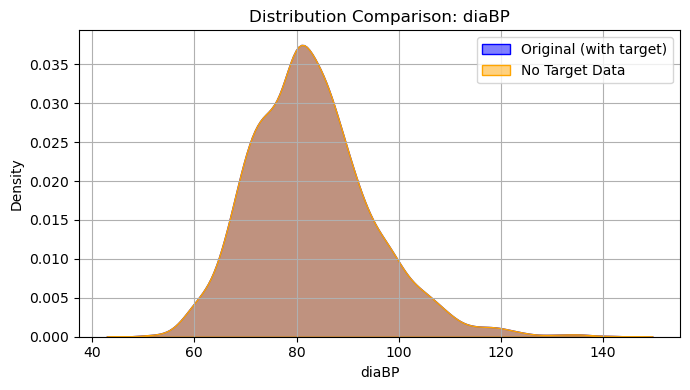

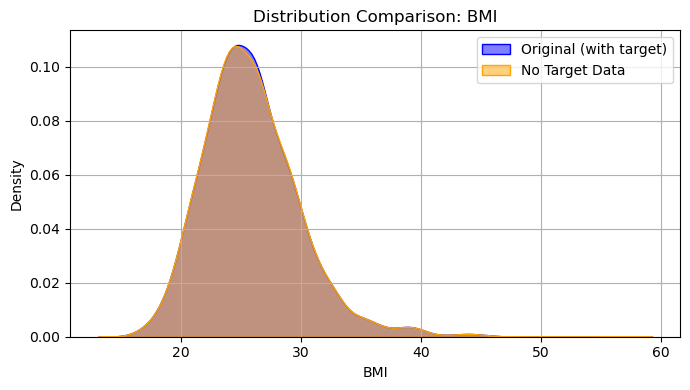

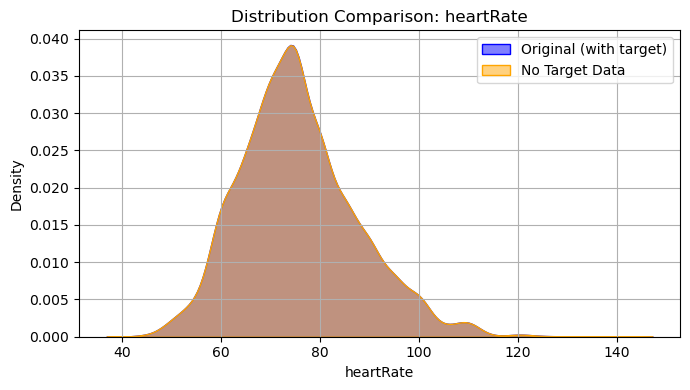

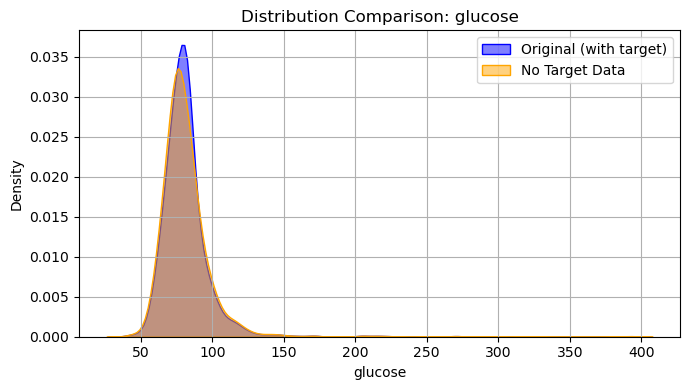

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Drop target column from df (df1 has no target) ===
df = df.drop(columns=['TenYearCHD'])

# === Step 2: Plot KDE comparison for each column ===
for col in df.columns:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(df[col].dropna(), label='Original (with target)', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(df1[col].dropna(), label='No Target Data', fill=True, color='orange', alpha=0.5)
    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


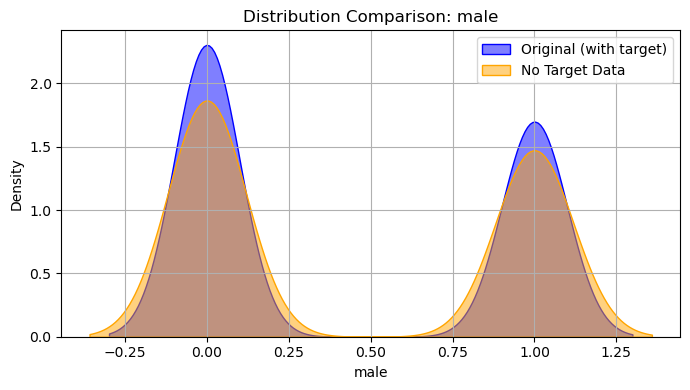

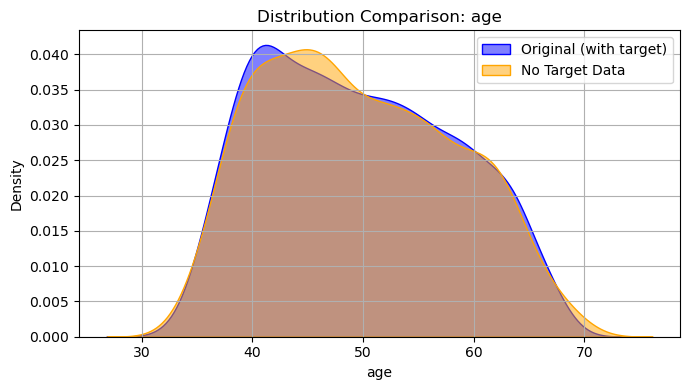

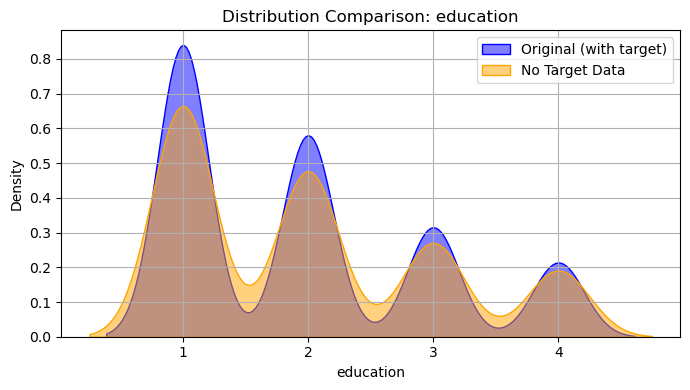

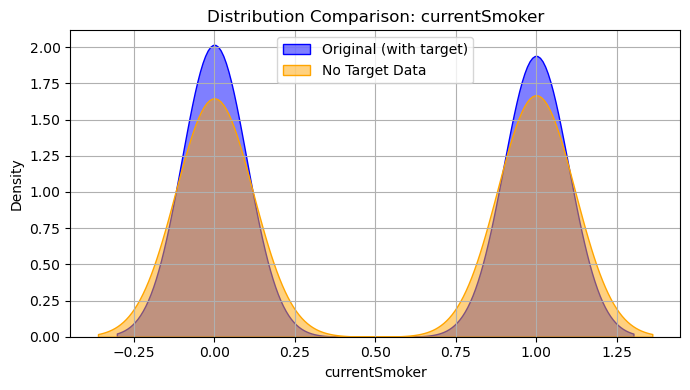

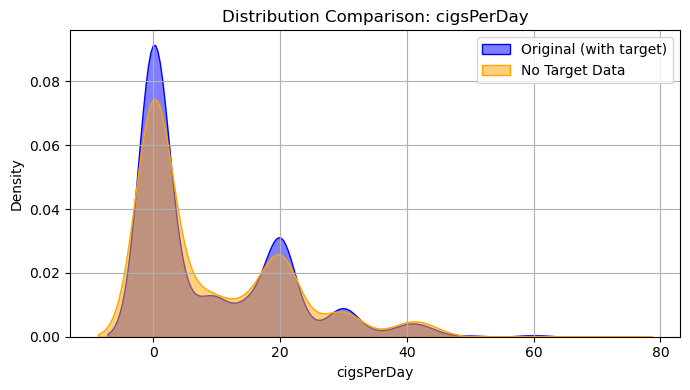

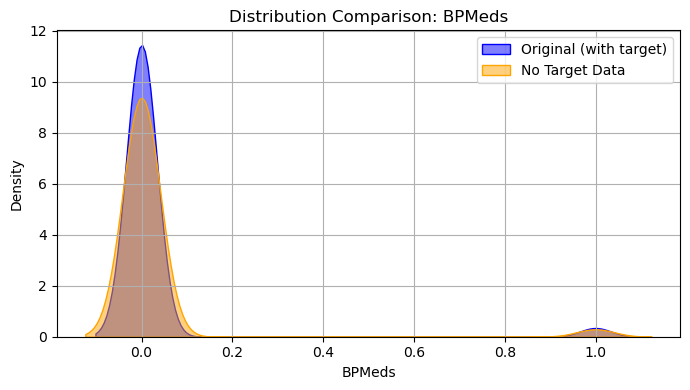

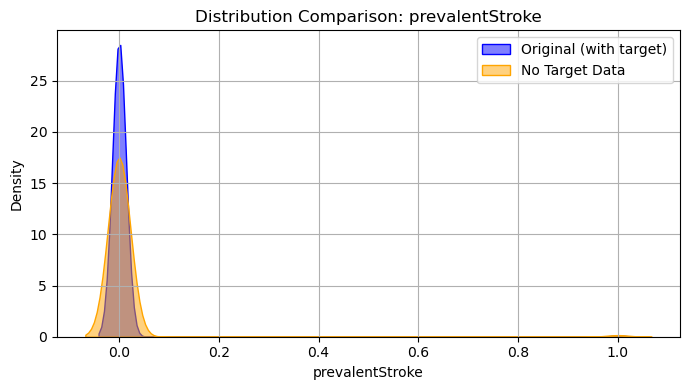

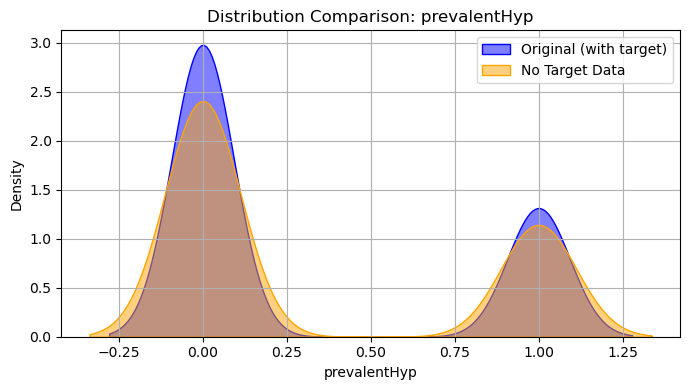

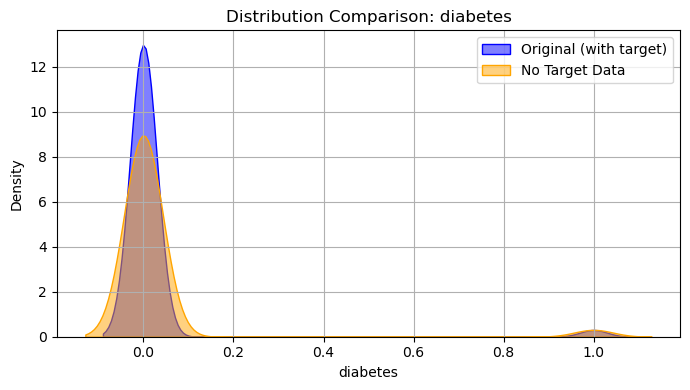

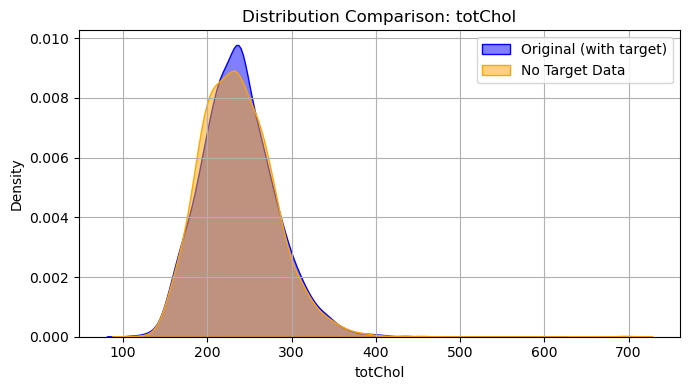

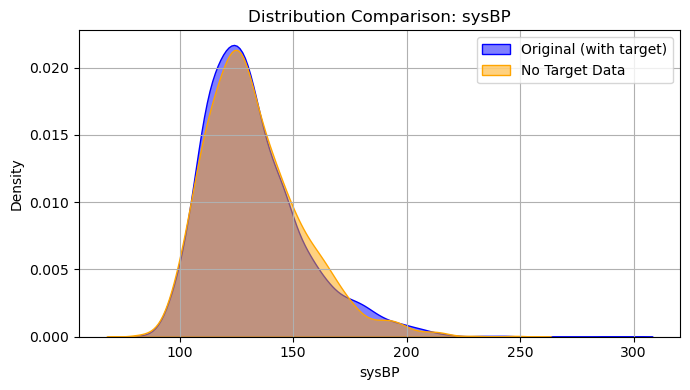

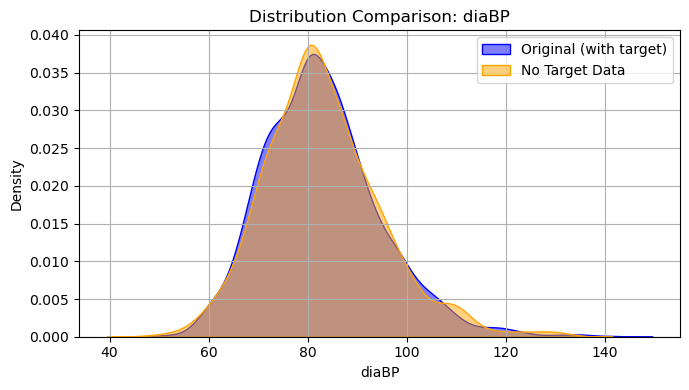

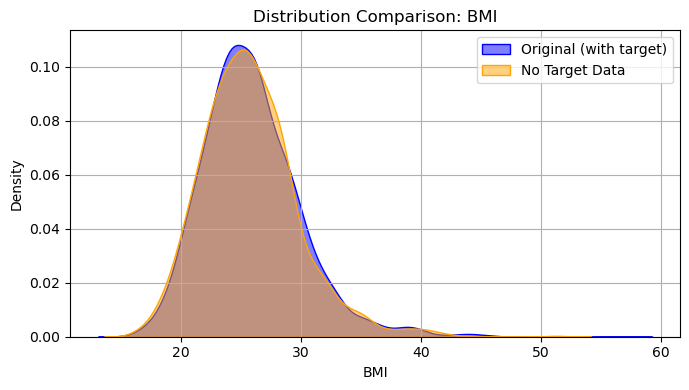

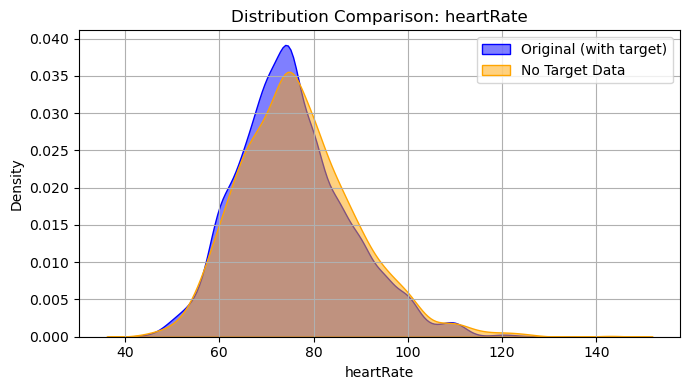

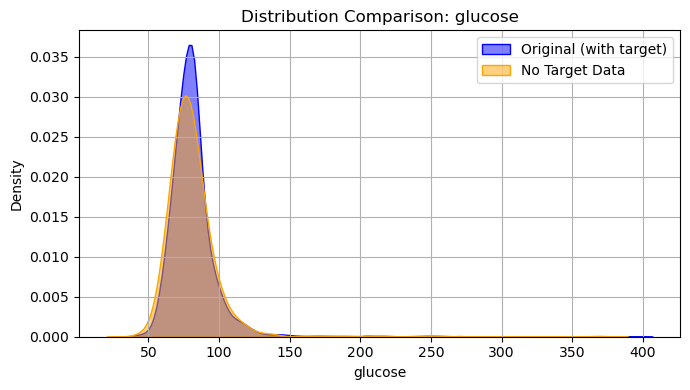

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# === Step 1: Drop target column from df (df1 has no target) ===
#df = df.drop(columns=['TenYearCHD'])

# === Step 2: Plot KDE comparison for each column ===
for col in df.columns:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(df[col].dropna(), label='Original (with target)', fill=True, color='blue', alpha=0.5)
    sns.kdeplot(df2[col].dropna(), label='No Target Data', fill=True, color='orange', alpha=0.5)
    plt.title(f'Distribution Comparison: {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Re training because we found drift

In [31]:
df3=pd.read_csv("framingham.csv")

In [32]:
#missing values treatment

# Fill categorical columns with mode
df3['education'].fillna(df3['education'].mode()[0], inplace=True)
df3['BPMeds'].fillna(df3['BPMeds'].mode()[0], inplace=True)

# Fill non-normally distributed column with median
df3['cigsPerDay'].fillna(df3['cigsPerDay'].median(), inplace=True)

# Fill normally distributed columns with mean
for col in ['totChol', 'BMI', 'heartRate', 'glucose']:
    df3[col].fillna(df3[col].mean(), inplace=True)

# Check if nulls are handled
print(df3.isnull().sum())

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


C:\Users\MounikaReddyBoggariV\AppData\Local\Temp\ipykernel_5104\4021641777.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3['education'].fillna(df3['education'].mode()[0], inplace=True)
C:\Users\MounikaReddyBoggariV\AppData\Local\Temp\ipykernel_5104\4021641777.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are sett

In [33]:
df3_selected = df3.drop(['currentSmoker', 'heartRate'], axis=1)


In [34]:
df3_selected.shape

(4240, 14)

In [35]:
from sklearn.preprocessing import RobustScaler

# Define continuous variables
continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to continuous variables
df3_selected[continuous_vars] = scaler.fit_transform(df3_selected[continuous_vars])

# Check scaled data (optional preview)
print(df3_selected[continuous_vars].head())


        age  cigsPerDay   totChol     sysBP     diaBP       BMI   glucose
0 -0.714286        0.00 -0.696429 -0.814815 -0.800000  0.314834 -0.230769
1 -0.214286        0.00  0.285714 -0.259259 -0.066667  0.670030 -0.307692
2 -0.071429        1.00  0.196429 -0.018519 -0.133333 -0.014127 -0.769231
3  0.857143        1.50 -0.160714  0.814815  0.866667  0.639758  1.769231
4 -0.214286        1.15  0.910714  0.074074  0.133333 -0.466196  0.384615


In [36]:
# Save the fitted scaler to use later in FastAPI
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("✅ Scaler saved as 'scaler.pkl'")


✅ Scaler saved as 'scaler.pkl'


In [37]:
from sklearn.model_selection import train_test_split
#step1: split data
# Separate features and target
X = df3_selected.drop('TenYearCHD', axis=1)
y = df3_selected['TenYearCHD']

# Perform the split (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3392, 13)
X_test shape: (848, 13)
y_train shape: (3392,)
y_test shape: (848,)


In [38]:
from sklearn.ensemble import IsolationForest

# Step 2: Build and train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
iso_forest.fit(X_train)

IsolationForest(random_state=42)

In [39]:
import pickle

# Step 3: Save the trained Isolation Forest model using pickle
with open('1isolation_forest_model.pkl', 'wb') as model_file:
    pickle.dump(iso_forest, model_file)

print("✅ Model saved as '1isolation_forest_model.pkl'")

✅ Model saved as '1isolation_forest_model.pkl'


=== Evaluation Metrics ===
Confusion Matrix:
[[652  67]
 [102  27]]
Accuracy: 0.8007
Precision: 0.2872
Recall: 0.2093
F1-Score: 0.2422


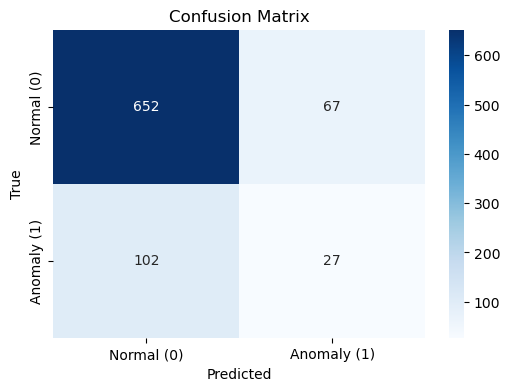

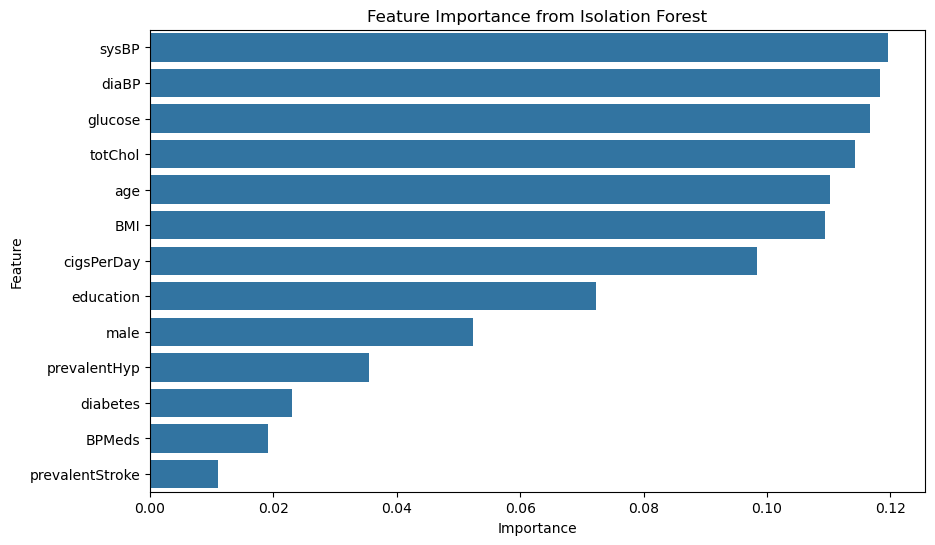

In [40]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Predict anomalies on the test set
y_pred = iso_forest.predict(X_test)
# Map Isolation Forest predictions: -1 (anomaly) -> 1, 1 (normal) -> 0
y_pred_mapped = np.where(y_pred == -1, 1, 0)

# Step 2: Compute evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred_mapped)
accuracy = accuracy_score(y_test, y_pred_mapped)
precision = precision_score(y_test, y_pred_mapped)
recall = recall_score(y_test, y_pred_mapped)
f1 = f1_score(y_test, y_pred_mapped)

# Print metrics
print("=== Evaluation Metrics ===")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Step 3: Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal (0)', 'Anomaly (1)'], 
            yticklabels=['Normal (0)', 'Anomaly (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Step 4: Compute and visualize feature importance
feature_importance = np.abs(iso_forest.feature_importances_) if hasattr(iso_forest, 'feature_importances_') else np.mean([tree.feature_importances_ for tree in iso_forest.estimators_], axis=0)
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar chart for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Isolation Forest')
plt.show()

inference pipeline

In [41]:
print(df1.isna().sum())
print(df1.shape)
print(df2.isna().sum())
print(df2.shape)


male                 0
age                  0
education           75
currentSmoker        0
cigsPerDay          15
BPMeds              40
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 17
heartRate            1
glucose            282
dtype: int64
(3000, 15)
male                 0
age                  0
education           30
currentSmoker        0
cigsPerDay          14
BPMeds              13
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             12
sysBP                0
diaBP                0
BMI                  2
heartRate            0
glucose            106
dtype: int64
(1240, 15)


In [42]:

# Define the missing value treatment function
def treat_missing_values(df):
    # Fill categorical columns with mode
    df['education'].fillna(df['education'].mode()[0], inplace=True)
    df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
    
    # Fill non-normally distributed column with median
    df['cigsPerDay'].fillna(df['cigsPerDay'].median(), inplace=True)
    
    # Fill normally distributed columns with mean
    for col in ['totChol', 'BMI', 'heartRate', 'glucose']:
        df[col].fillna(df[col].mean(), inplace=True)
    
    return df

# Apply the treatment
df1 = treat_missing_values(df1)
df2 = treat_missing_values(df2)

# Check nulls to confirm
print("🧼 Nulls in df1:\n", df1.isnull().sum())
print("\n🧼 Nulls in df2:\n", df2.isnull().sum())


🧼 Nulls in df1:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

🧼 Nulls in df2:
 male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64


C:\Users\MounikaReddyBoggariV\AppData\Local\Temp\ipykernel_5104\1375412025.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df['education'].mode()[0], inplace=True)
C:\Users\MounikaReddyBoggariV\AppData\Local\Temp\ipykernel_5104\1375412025.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

In [43]:
# Drop the columns from both dataframes
df1_selected = df1.drop(['currentSmoker', 'heartRate'], axis=1)
df2_selected = df2.drop(['currentSmoker', 'heartRate'], axis=1)

# Check the shapes to confirm
print("df1_selected shape:", df1_selected.shape)
print("df2_selected shape:", df2_selected.shape)

df1_selected shape: (3000, 13)
df2_selected shape: (1240, 13)


In [44]:
# Define continuous variables
continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'glucose']

# Initialize RobustScaler
scaler = RobustScaler()

# Scale continuous variables in df1
df1_selected[continuous_vars] = scaler.fit_transform(df1_selected[continuous_vars])

# Scale continuous variables in df2
df2_selected[continuous_vars] = scaler.fit_transform(df2_selected[continuous_vars])

# Optional: preview scaled data
print("df1 scaled preview:\n", df1_selected[continuous_vars].head())
print("\ndf2 scaled preview:\n", df2_selected[continuous_vars].head())

df1 scaled preview:
         age  cigsPerDay   totChol     sysBP  diaBP    BMI   glucose
0 -0.714286        0.00 -0.714286 -0.814815 -0.768  0.311 -0.244898
1 -0.214286        0.00  0.267857 -0.259259 -0.064  0.663 -0.326531
2 -0.071429        1.00  0.178571 -0.018519 -0.128 -0.015 -0.816327
3  0.857143        1.50 -0.178571  0.814815  0.832  0.633  1.877551
4 -0.214286        1.15  0.892857  0.074074  0.128 -0.463  0.408163

df2 scaled preview:
         age  cigsPerDay   totChol     sysBP     diaBP       BMI    glucose
0 -0.384615         2.0 -0.017467 -0.150943  0.266667 -0.439049   0.076923
1  0.153846         0.0 -0.576419 -0.528302 -0.400000  1.141123   0.253222
2  0.461538         1.0 -0.296943 -0.150943 -0.133333  0.360142  12.692308
3 -0.076923         1.0  0.436681  0.792453  1.533333  0.109256  -1.461538
4  1.153846         0.0 -0.838428 -1.320755 -1.333333  0.143652  -0.846154


In [45]:
df1_selected

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,1,-0.714286,4.0,0.00,0.0,0,0,0,-0.714286,-0.814815,-0.768,0.311,-0.244898
1,0,-0.214286,2.0,0.00,0.0,0,0,0,0.267857,-0.259259,-0.064,0.663,-0.326531
2,1,-0.071429,1.0,1.00,0.0,0,0,0,0.178571,-0.018519,-0.128,-0.015,-0.816327
3,0,0.857143,3.0,1.50,0.0,0,1,0,-0.178571,0.814815,0.832,0.633,1.877551
4,0,-0.214286,3.0,1.15,0.0,0,0,0,0.892857,0.074074,0.128,-0.463,0.408163
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0.928571,2.0,0.00,0.0,0,0,0,1.464286,-0.074074,-0.448,-0.425,0.489796
2996,0,0.071429,1.0,0.00,0.0,0,0,0,-0.107143,-0.259259,0.224,-0.465,-0.408163
2997,1,-0.928571,4.0,2.00,0.0,0,0,0,-0.625000,-0.925926,-0.928,1.081,-0.653061
2998,1,-0.357143,1.0,0.00,0.0,0,0,0,-0.017857,0.259259,0.384,0.047,0.244898


In [46]:
df2_selected

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose
0,1,-0.384615,2.0,2.00,0.0,0,0,0,-0.017467,-0.150943,0.266667,-0.439049,0.076923
1,1,0.153846,4.0,0.00,0.0,0,1,0,-0.576419,-0.528302,-0.400000,1.141123,0.253222
2,0,0.461538,3.0,1.00,0.0,0,0,1,-0.296943,-0.150943,-0.133333,0.360142,12.692308
3,1,-0.076923,2.0,1.00,0.0,0,1,0,0.436681,0.792453,1.533333,0.109256,-1.461538
4,1,1.153846,1.0,0.00,0.0,0,0,0,-0.838428,-1.320755,-1.333333,0.143652,-0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235,0,-0.076923,2.0,1.00,0.0,0,0,0,0.262009,0.075472,-0.666667,-0.687911,0.538462
1236,0,-0.384615,1.0,0.75,0.0,0,0,0,-0.401747,-0.094340,0.333333,-1.262519,0.253222
1237,0,0.230769,2.0,0.00,0.0,0,0,0,0.628821,0.169811,0.066667,-0.795144,2.153846
1238,1,-0.692308,3.0,0.00,0.0,0,1,0,-0.838428,0.452830,1.066667,0.040465,-0.538462


In [47]:
import pandas as pd
import pickle

# === Step 1: Load the trained model ===
with open("1isolation_forest_model.pkl", "rb") as f:
    iso_forest_model = pickle.load(f)

# === Step 2: Ensure clean input (drop non-training columns if added earlier) ===
# Optionally, define the feature set the model was trained on
expected_features = iso_forest_model.feature_names_in_

# Create clean input DataFrames with only expected features
df1_input = df1_selected[expected_features].copy()
df2_input = df2_selected[expected_features].copy()

# === Step 3: Generate predictions ===
# Predict with Isolation Forest (-1 for anomaly, 1 for normal) and map to TenYearCHD (1 for anomaly, 0 for normal)
df1_selected['Predicted_TenYearCHD'] = [1 if pred == -1 else 0 for pred in iso_forest_model.predict(df1_input)]
df2_selected['Predicted_TenYearCHD'] = [1 if pred == -1 else 0 for pred in iso_forest_model.predict(df2_input)]

# === Step 4: Save results ===
df1_selected.to_csv("df1_predictions.csv", index=False)
df2_selected.to_csv("df2_predictions.csv", index=False)

print("✅ Prediction files saved as df1_predictions.csv and df2_predictions.csv")

✅ Prediction files saved as df1_predictions.csv and df2_predictions.csv


In [48]:
import pandas as pd

# Step 1: Load the predicted datasets
df1 = pd.read_csv("df1_predictions.csv")
df2 = pd.read_csv("df2_predictions.csv")

# Step 2: Count 0s and 1s in the Predicted_TenYearCHD column for each dataset
df1_chd_counts = df1['Predicted_TenYearCHD'].value_counts()
df2_chd_counts = df2['Predicted_TenYearCHD'].value_counts()

# Step 3: Display the counts
print("=== df1_predictions.csv: CHD Prediction Distribution ===")
print(df1_chd_counts)
print("\n=== df2_predictions.csv: CHD Prediction Distribution ===")
print(df2_chd_counts)

# Step 4 (optional): Show percentages
df1_total = df1_chd_counts.sum()
df1_chd_percentages = (df1_chd_counts / df1_total) * 100

df2_total = df2_chd_counts.sum()
df2_chd_percentages = (df2_chd_counts / df2_total) * 100

print("\n=== df1_predictions.csv: CHD Prediction Percentages ===")
for label, percent in df1_chd_percentages.items():
    print(f"Class {label} ({'Normal' if label == 0 else 'Anomaly'}): {percent:.2f}%")

print("\n=== df2_predictions.csv: CHD Prediction Percentages ===")
for label, percent in df2_chd_percentages.items():
    print(f"Class {label} ({'Normal' if label == 0 else 'Anomaly'}): {percent:.2f}%")

=== df1_predictions.csv: CHD Prediction Distribution ===
Predicted_TenYearCHD
0    2658
1     342
Name: count, dtype: int64

=== df2_predictions.csv: CHD Prediction Distribution ===
Predicted_TenYearCHD
0    1084
1     156
Name: count, dtype: int64

=== df1_predictions.csv: CHD Prediction Percentages ===
Class 0 (Normal): 88.60%
Class 1 (Anomaly): 11.40%

=== df2_predictions.csv: CHD Prediction Percentages ===
Class 0 (Normal): 87.42%
Class 1 (Anomaly): 12.58%
